In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## upload tha dataset by using read_csv
df=pd.read_csv("/content/imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
# chech the shape of the dataset
df.shape

(1000, 16)

In [ ]:
# check the dtypes of columns
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [ ]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
# fetching statistical data
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [ ]:
# check the unique value
df.nunique()

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

In [ ]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

### Data Cleaning

check the duplicate value

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

sum of dupliated values

In [ ]:
df.duplicated().sum()

0

Extract all categorical columns

In [ ]:
cat_cols=df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'Gross'],
      dtype='object')


Extract all numerical columns

In [ ]:
num_cols=df.select_dtypes(exclude="object").columns
print(num_cols)

Index(['IMDB_Rating', 'Meta_score', 'No_of_Votes'], dtype='object')


check how many null values are

In [ ]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

# Handling the null values

Handle the null values of categorical columns using mode

In [ ]:
# for certificate column
print(df["Certificate"].mode())

0    U
Name: Certificate, dtype: object


In [ ]:
df["Certificate"].fillna(str(df["Certificate"].mode().values[0]),inplace=True)

In [ ]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

now, for Gross columns which is also caategorical

In [ ]:
## mode for gross column
print(df["Gross"].mode())

0    4,360,000
Name: Gross, dtype: object


In [ ]:
# fill the null values by mode
df["Gross"].fillna(str(df["Gross"].mode().values[0]),inplace=True)

In [ ]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

Handle the null values of numerical column which is Meta score using mean


In [ ]:
# find the mean of the meta score column
meta_mean=df["Meta_score"].mean()
print(meta_mean)

77.97153024911032


In [ ]:
# fill the null values by mean
df["Meta_score"].fillna(meta_mean,inplace=True)

In [ ]:
df.isnull().sum()          ## Now here no null values are

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [ ]:
df.isnull().any()

Poster_Link      False
Series_Title     False
Released_Year    False
Certificate      False
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score       False
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross            False
dtype: bool

### Featured Selection

drop the poster link column beacaue it has no role

In [ ]:
df.drop("Poster_Link", axis=1, inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


drop the runtime column also

In [ ]:
df.drop("Runtime", axis=1, inplace=True)
df

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,"4,360,000"
996,Giant,1956,G,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,"4,360,000"
997,From Here to Eternity,1953,Passed,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,U,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,"4,360,000"


drop the overview column also

In [ ]:
df.drop("Overview", axis=1, inplace= True)

drop the columns star 3 and star 4 because it has no impact

In [ ]:
df.drop(["Star3","Star4"], axis=1, inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,"28,341,469"
1,The Godfather,1972,A,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,"134,966,411"
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,"57,300,000"
4,12 Angry Men,1957,U,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,"4,360,000"


Univariate analysis

Analysis on Gross feature

In [ ]:
df["Gross"].head()

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
Name: Gross, dtype: object

we will convert this to numeric

In [ ]:
df["Gross"] = df["Gross"].str.replace(" ", "").str.replace(",", "").astype(float) ## we used replace which was helping to replace inrelevant content

In [ ]:
df["Gross"]

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995      4360000.0
996      4360000.0
997     30500000.0
998      4360000.0
999      4360000.0
Name: Gross, Length: 1000, dtype: float64

Boxplot graph for whole data

<Axes: >

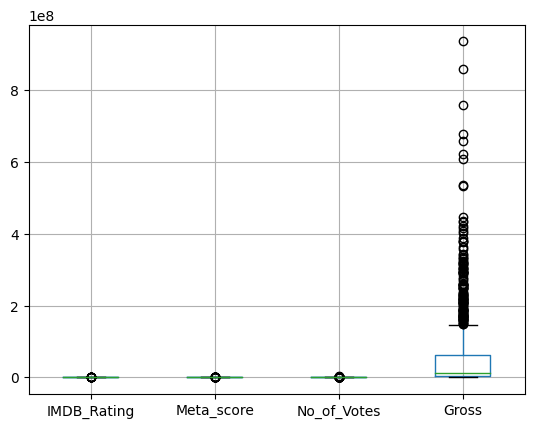

In [ ]:
df.boxplot()

array([[<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>],
       [<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

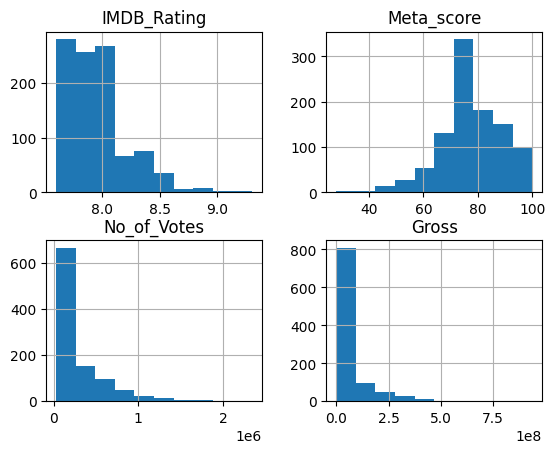

In [ ]:
df.hist()      # creating a hist plot

In [ ]:
# find unique values 

df["Released_Year"].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [ ]:
## year in which maximum movies released
df["Released_Year"].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

we can make useful this if we remove that PG row

In [ ]:
## check the index number of PG row

df["Released_Year"].loc[df["Released_Year"]=="PG"]

966    PG
Name: Released_Year, dtype: object

drop the row which have 966 index

In [ ]:
df.drop(labels=966, axis=0, inplace=True)

In [ ]:
df[964:968]

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
964,Dead Man,1995,R,"Adventure, Drama, Fantasy",7.6,62.0,Jim Jarmusch,Johnny Depp,Gary Farmer,90442,1037847.0
965,The Bridges of Madison County,1995,A,"Drama, Romance",7.6,69.0,Clint Eastwood,Clint Eastwood,Meryl Streep,73172,71516617.0
967,Trois couleurs: Blanc,1994,U,"Comedy, Drama, Romance",7.6,88.0,Krzysztof Kieslowski,Zbigniew Zamachowski,Julie Delpy,64390,1464625.0
968,Falling Down,1993,R,"Action, Crime, Drama",7.6,56.0,Joel Schumacher,Michael Douglas,Robert Duvall,171640,40903593.0


In [ ]:
## check the datatype of released year column

df["Released_Year"].dtypes

dtype('O')

change the datatype of released year column from "o" to int

In [ ]:
df["Released_Year"].astype(int)

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 999, dtype: int64

plot a countplot graph for released year 

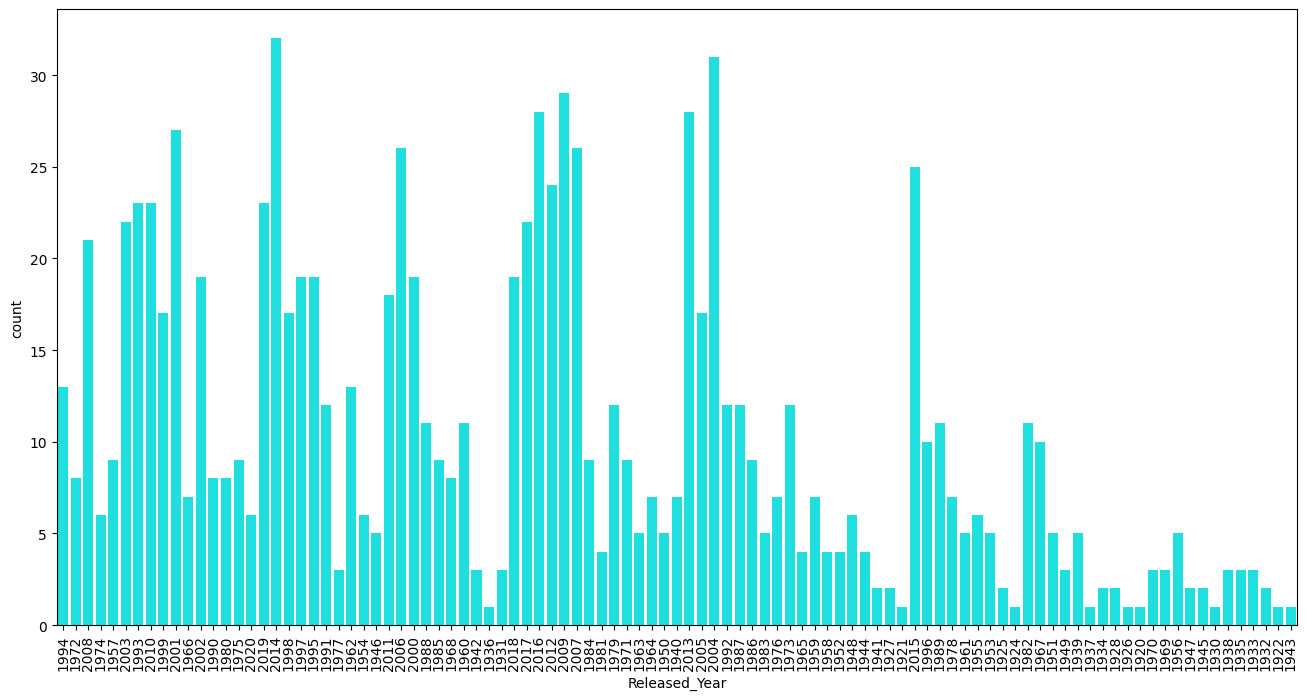

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x="Released_Year", data=df, color="#00ffff")
plt.xticks(rotation=90)
plt.show()

In [ ]:
## let's bring some categories together by using .loc() method

df.loc[df["Certificate"]=="U/A","Certificate"]="UA"
df.loc[df["Certificate"]=="G","Certificate"]="U"
df.loc[df["Certificate"]=="Approved","Certificate"]="Passed"
df.loc[df["Certificate"]=="TV-PG","Certificate"]="PG"
df.loc[df["Certificate"]=="GP","Certificate"]="PG"
df.loc[df["Certificate"]=="TV-14","Certificate"]="PG-13"
df.loc[df["Certificate"]=="16","Certificate"]="R"
df.loc[df["Certificate"]=="TV-MA","Certificate"]="R"

## assuming missing certificate data means movies are unrated
## filling null values with unrated one

df.loc[df["Certificate"].isna(),"Certificate"]="Unrated"

In [ ]:
# countings values of certificate column

df["Certificate"].value_counts()

U          346
A          197
UA         176
R          148
Passed      45
PG-13       44
PG          42
Unrated      1
Name: Certificate, dtype: int64

countplot for certificate
 
 which certificate movies are in top rated...

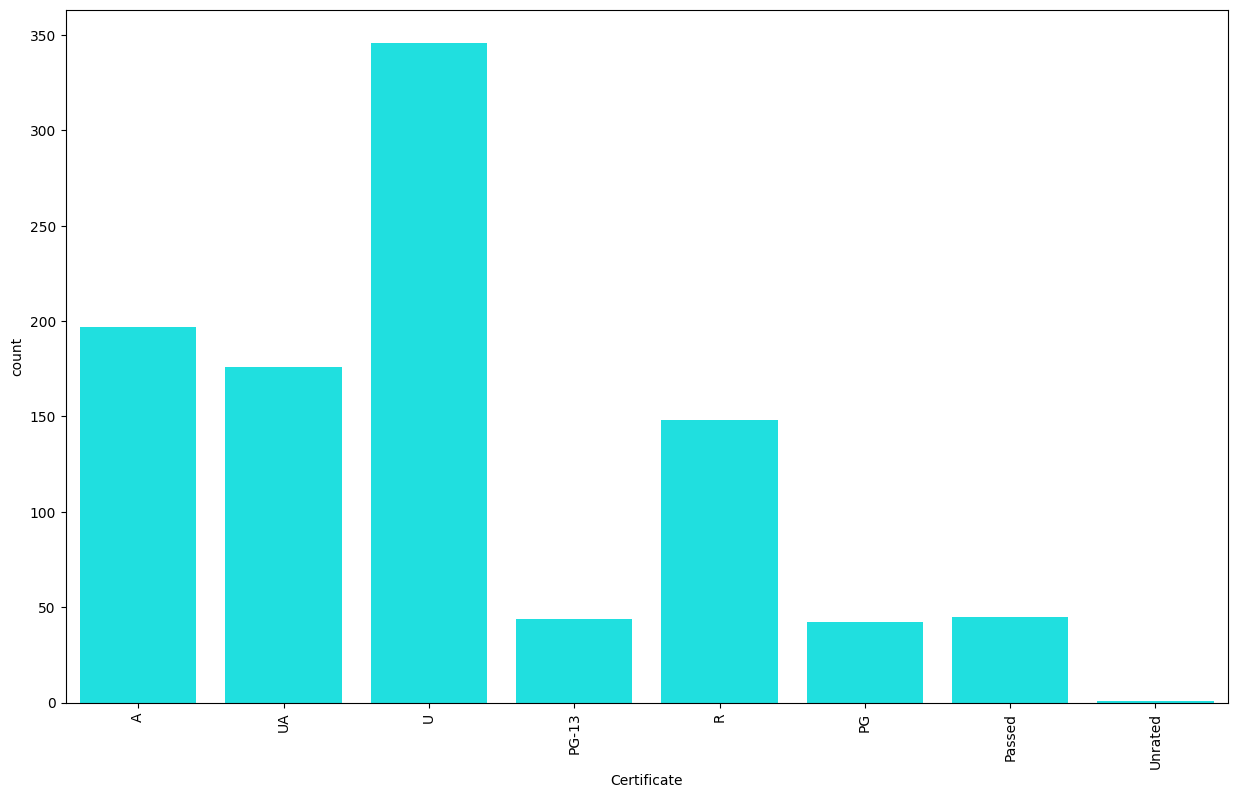

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(x="Certificate", data=df, color="#00ffff")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["IMDB_Rating"].value_counts()

7.7    157
7.8    151
8.0    141
8.1    127
7.6    122
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

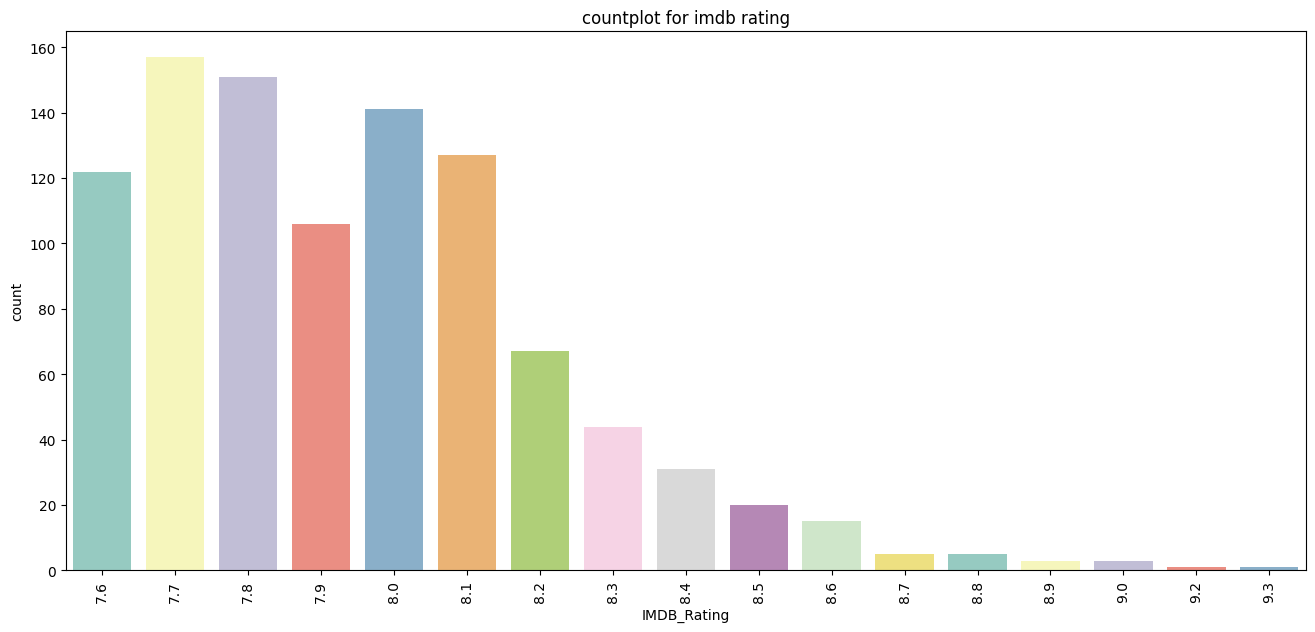

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x="IMDB_Rating", data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("countplot for imdb rating")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

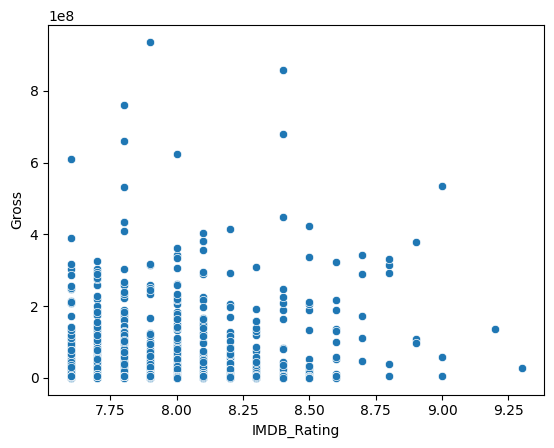

In [ ]:
### scatter for relationship of imdb rating and gross

sns.scatterplot(data=df, x="IMDB_Rating", y="Gross")
plt.show

<ipython-input-99-d0863bdd9669>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x="IMDB_Rating",palette="bright")


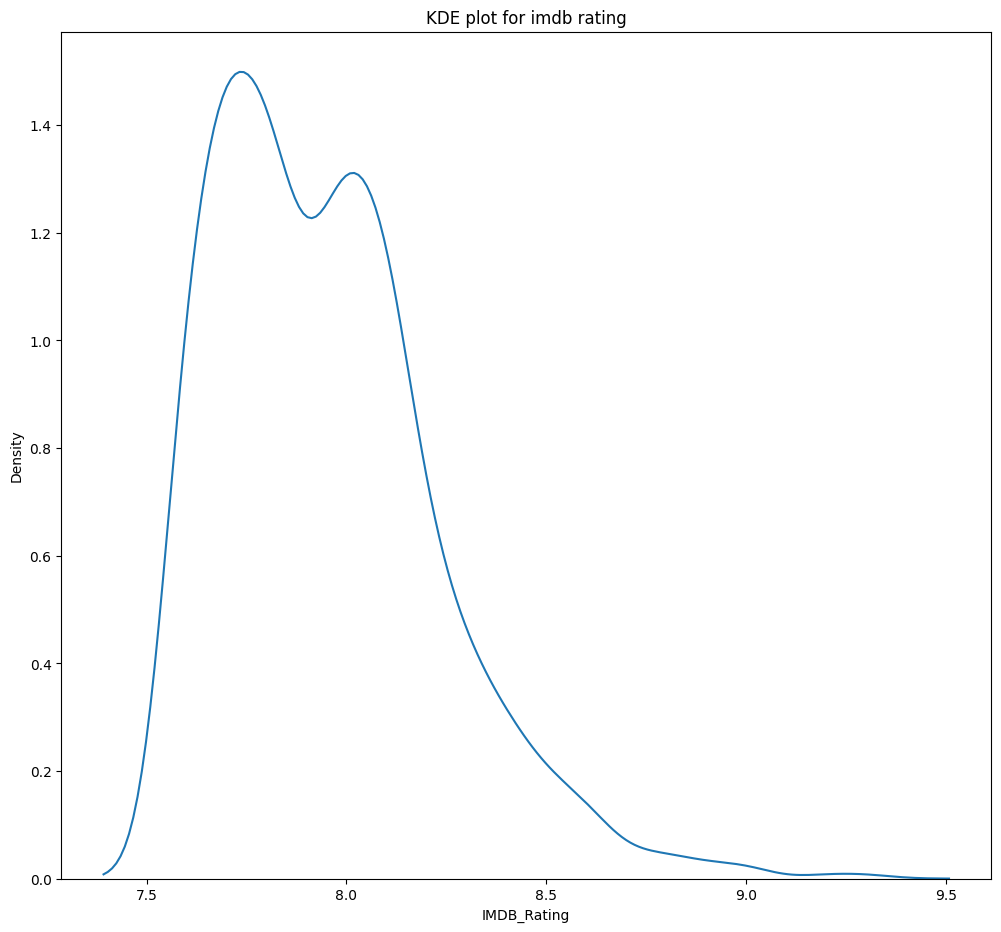

In [ ]:
## kde plot for imdb rating
plt.figure(figsize=(12,11))
sns.kdeplot(data=df, x="IMDB_Rating",palette="bright")
plt.title("KDE plot for imdb rating")
plt.show()


groupwise analysis

In [ ]:
gen_re=df.groupby("Genre")["Genre"].count().sort_values(ascending=False)
gen_re     ### genre with maximum number of movies

Genre
Drama                         85
Drama, Romance                37
Comedy, Drama                 35
Comedy, Drama, Romance        31
Action, Crime, Drama          30
                              ..
Crime, Drama, Sci-Fi           1
Animation, Comedy, Fantasy     1
Animation, Crime, Mystery      1
Crime, Drama, Musical          1
Crime, Drama, Horror           1
Name: Genre, Length: 202, dtype: int64

<Axes: >

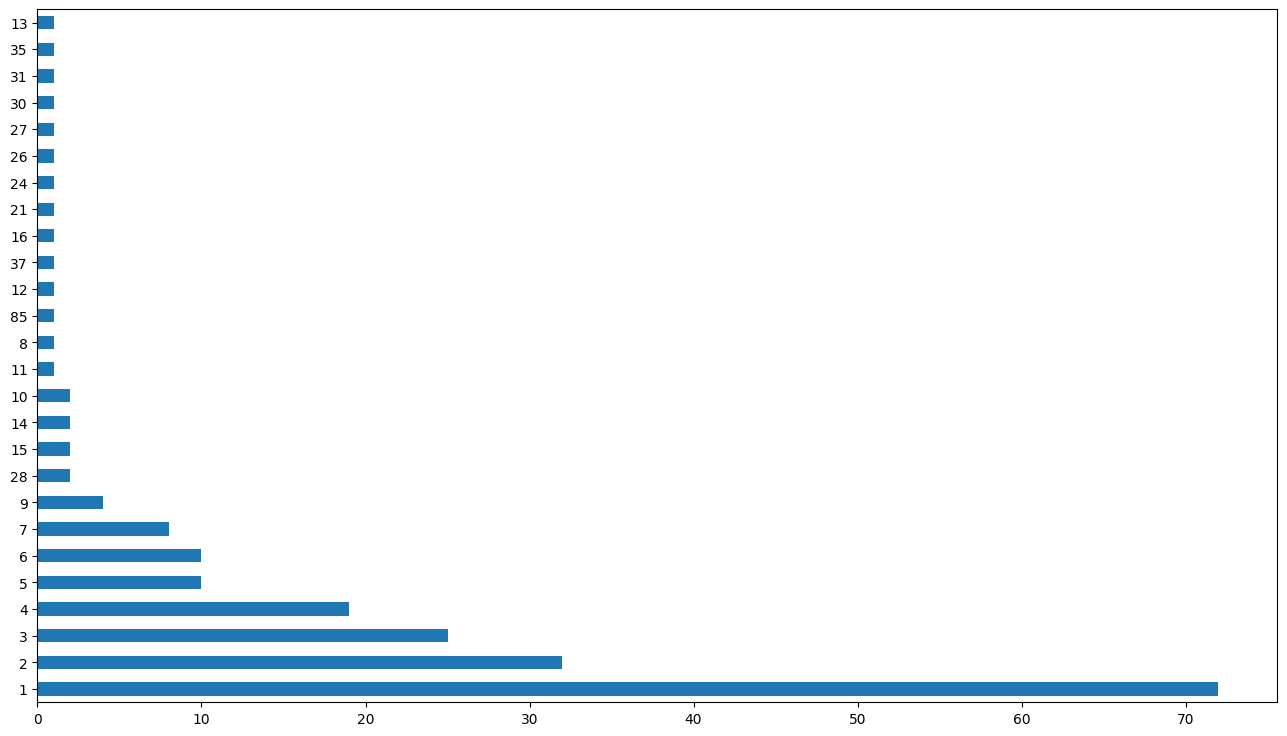

In [ ]:
gen_re.value_counts().plot(kind="barh",figsize=(16,9), x="Genre",y="counts",)

In [ ]:
##Top 5 star who got most rating from the column Star1

a3=df.groupby("Star1")["IMDB_Rating"].sum().sort_values(ascending=False)
a3

Star1
Tom Hanks            88.9
Robert De Niro       88.8
Al Pacino            80.1
Clint Eastwood       79.7
Leonardo DiCaprio    73.2
                     ... 
Nora Twomey           7.6
Emily Blunt           7.6
Emma Thompson         7.6
Miki Imai             7.6
Jose Coronado         7.6
Name: IMDB_Rating, Length: 660, dtype: float64

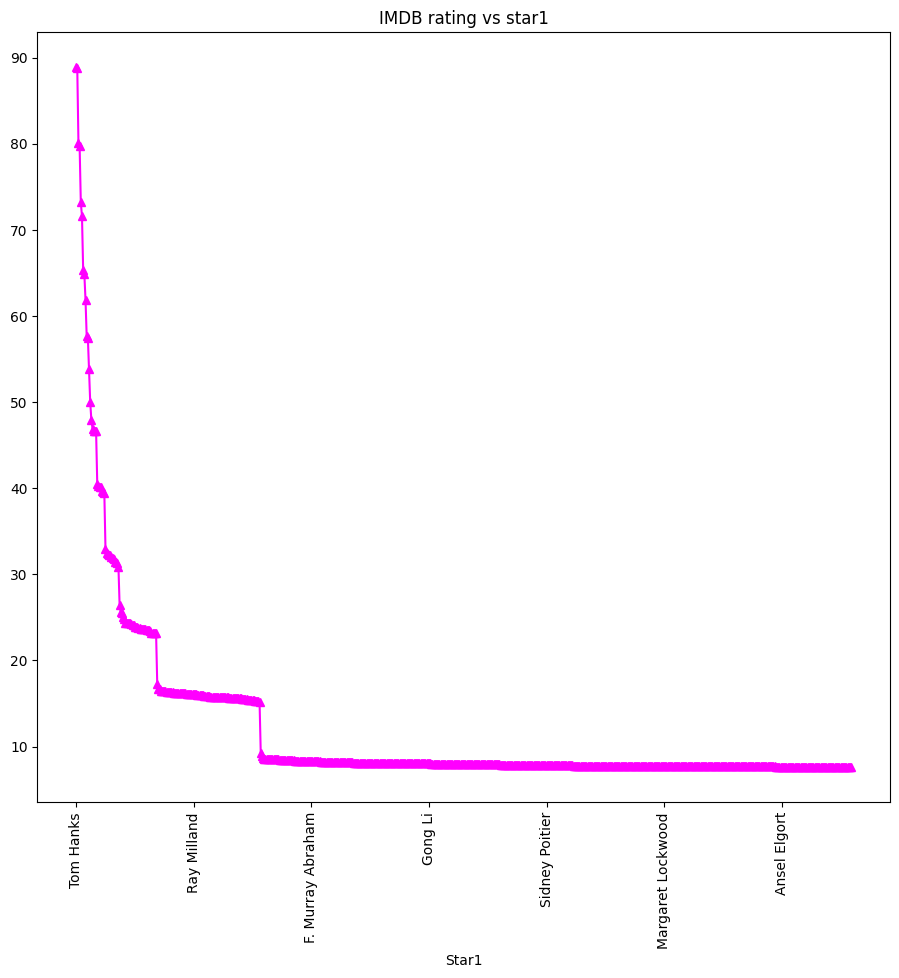

In [ ]:
# plot a line graph for imdb rating vs star1

plt.figure(figsize=(11,10))
a3.plot(kind="line", marker="^", color="Magenta")
plt.xticks(rotation=90)
plt.title("IMDB rating vs star1")
plt.show()

In [ ]:
# top 5 star who got most rating from star2
a4=df.groupby("Star2")["IMDB_Rating"].sum().sort_values(ascending=False)
a4

Star2
Emma Watson          54.8
Matt Damon           41.0
Ian McKellen         33.2
Brad Pitt            32.2
Julie Delpy          31.7
                     ... 
Ben Foster            7.6
Nina van Pallandt     7.6
Keri Russell          7.6
Jon Bernthal          7.6
John Candy            7.6
Name: IMDB_Rating, Length: 840, dtype: float64

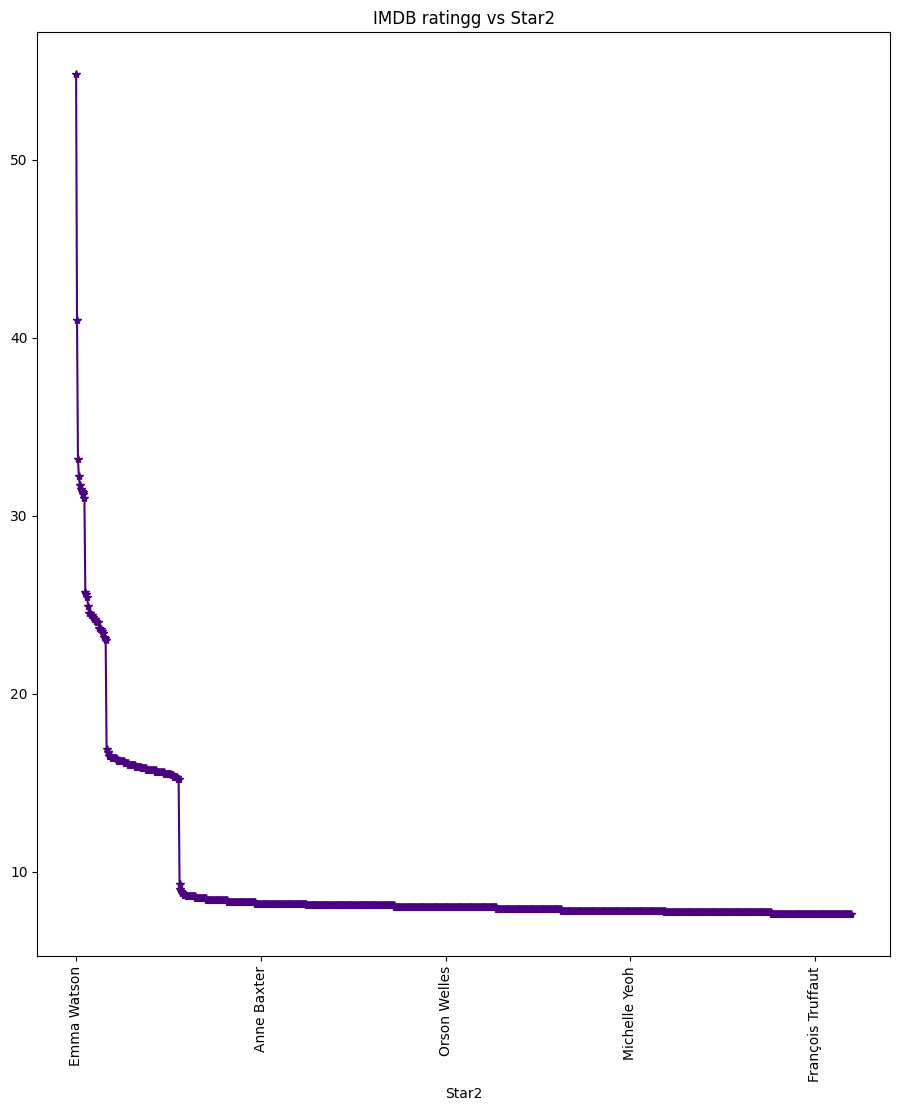

In [ ]:
#plot a line graph for imdb rating vs star2
plt.figure(figsize=(11,12))
a4.plot(kind="line", marker="*", color="Indigo")
plt.xticks(rotation=90)
plt.title("IMDB ratingg vs Star2")
plt.show()

In [ ]:
# Genres with highest imdb rating
a1=df.groupby("Genre")["IMDB_Rating"].sum().sort_values(ascending=False).head(20)
a1

Genre
Drama                           677.9
Drama, Romance                  293.6
Comedy, Drama                   275.5
Comedy, Drama, Romance          244.2
Action, Crime, Drama            236.4
Biography, Drama, History       224.6
Crime, Drama, Thriller          222.5
Crime, Drama, Mystery           215.1
Crime, Drama                    212.1
Animation, Adventure, Comedy    190.2
Action, Adventure, Sci-Fi       166.5
Biography, Crime, Drama         126.8
Drama, War                      121.1
Comedy, Crime, Drama            118.9
Action, Adventure, Drama        114.1
Drama, Thriller                 110.0
Comedy                          101.7
Biography, Drama                 95.8
Animation, Action, Adventure     87.5
Action, Adventure, Comedy        79.1
Name: IMDB_Rating, dtype: float64

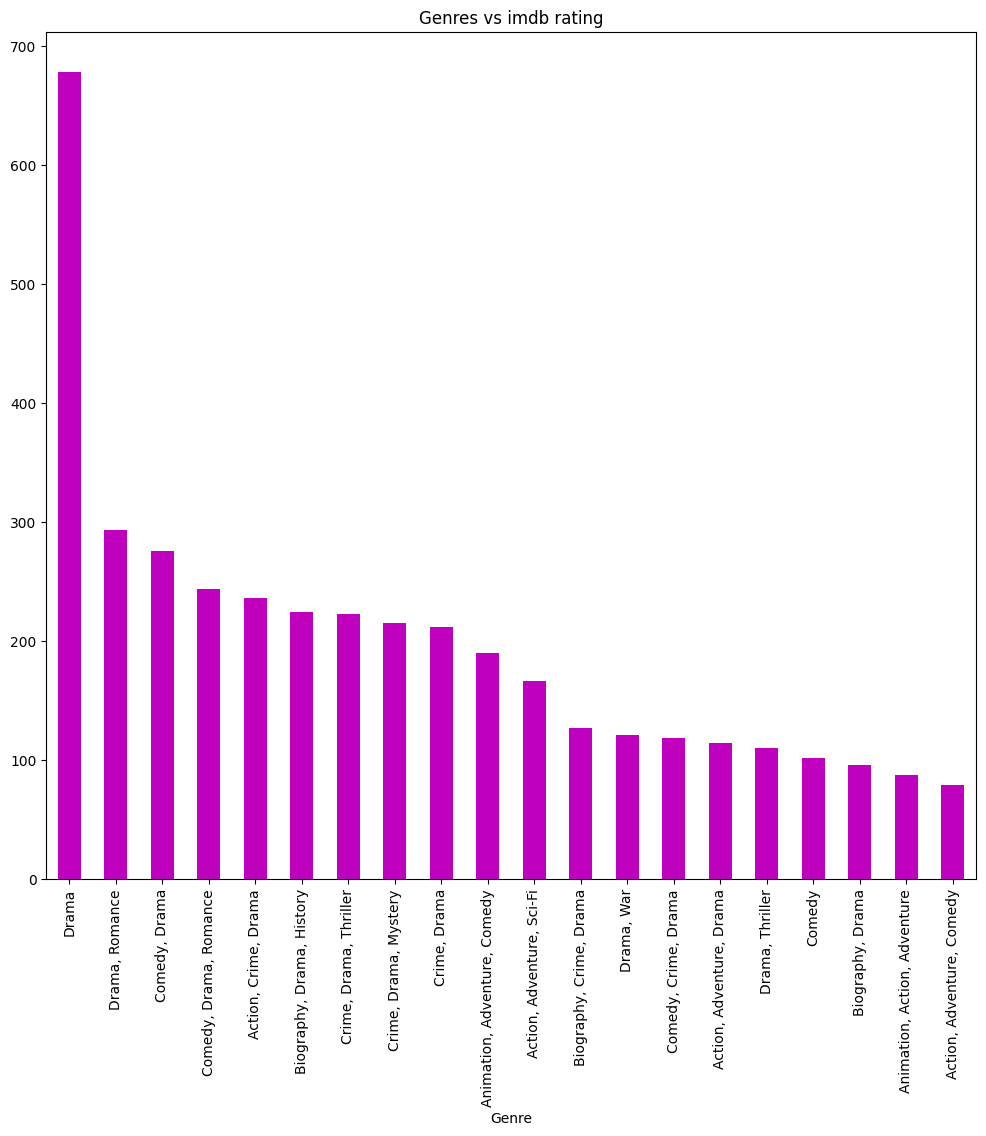

In [ ]:
# plot a bar graph 
plt.figure(figsize=(12,11))
a1.plot(kind="bar", color=('m'))
plt.xticks(rotation=90)
plt.title("Genres vs imdb rating")
plt.show()

find the sum of imdb rating on the basis of director

In [ ]:
a1=df.groupby("Director")["IMDB_Rating"].sum().sort_values(ascending=False).head(20)
a1

Director
Alfred Hitchcock     112.1
Steven Spielberg     104.4
Hayao Miyazaki        88.2
Akira Kurosawa        82.2
Martin Scorsese       81.7
Stanley Kubrick       74.1
Billy Wilder          73.3
Woody Allen           70.1
Christopher Nolan     67.7
Quentin Tarantino     65.4
David Fincher         64.3
Clint Eastwood        63.3
Ingmar Bergman        57.0
Howard Hawks          55.0
Rob Reiner            54.8
Charles Chaplin       50.0
Sergio Leone          49.6
Ridley Scott          48.5
Richard Linklater     47.4
Wes Anderson          47.0
Name: IMDB_Rating, dtype: float64

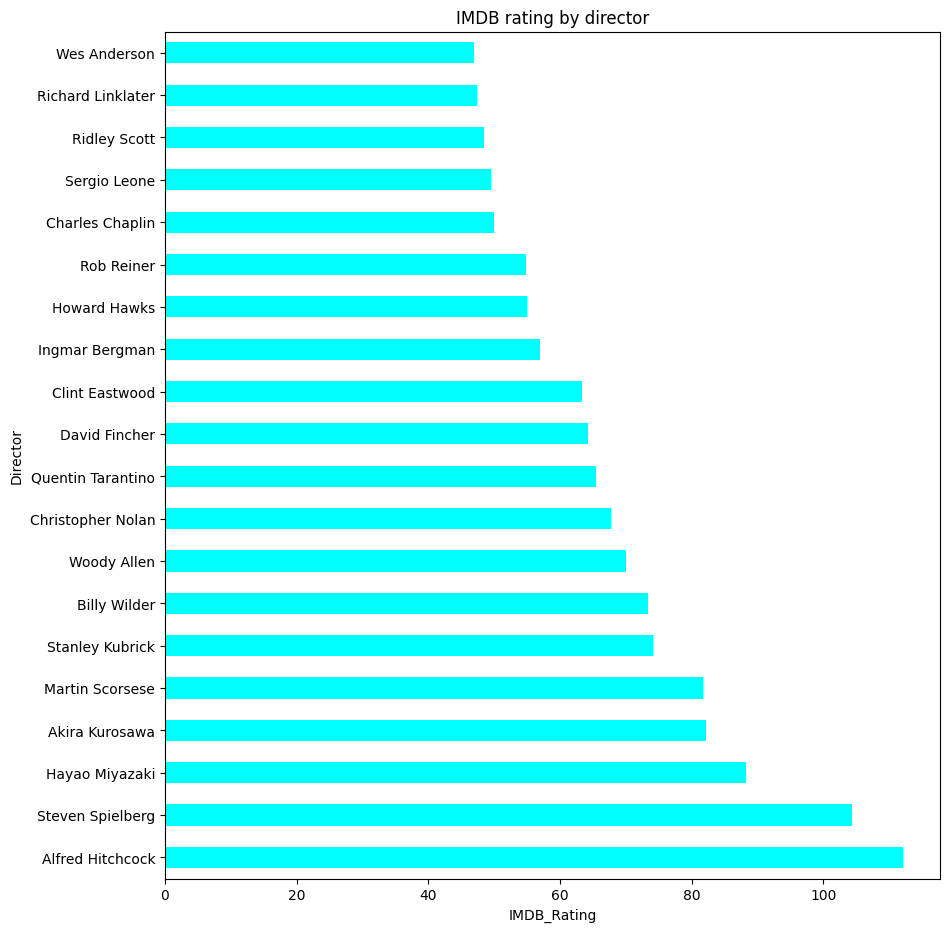

In [ ]:
## plot a barh garph for imdb rating by director
plt.figure(figsize=(10,11))
a1.plot(kind="barh", figsize=(10,11),x="Director", y="IMDB_Rating", color="Cyan")
plt.xlabel("IMDB_Rating")
plt.ylabel("Director")
plt.title("IMDB rating by director")
plt.show()

find the mean of meta score on the basis of genre

In [ ]:
## find the mean of meta score on the basis of genre
a2=df.groupby("Genre")["Meta_score"].mean()
a2

Genre
Action, Adventure                71.800000
Action, Adventure, Biography     77.971530
Action, Adventure, Comedy        70.191459
Action, Adventure, Crime         77.971530
Action, Adventure, Drama         80.283681
                                   ...    
Mystery, Romance, Thriller      100.000000
Mystery, Sci-Fi, Thriller        70.000000
Mystery, Thriller                78.320680
Thriller                         81.000000
Western                          78.250000
Name: Meta_score, Length: 202, dtype: float64

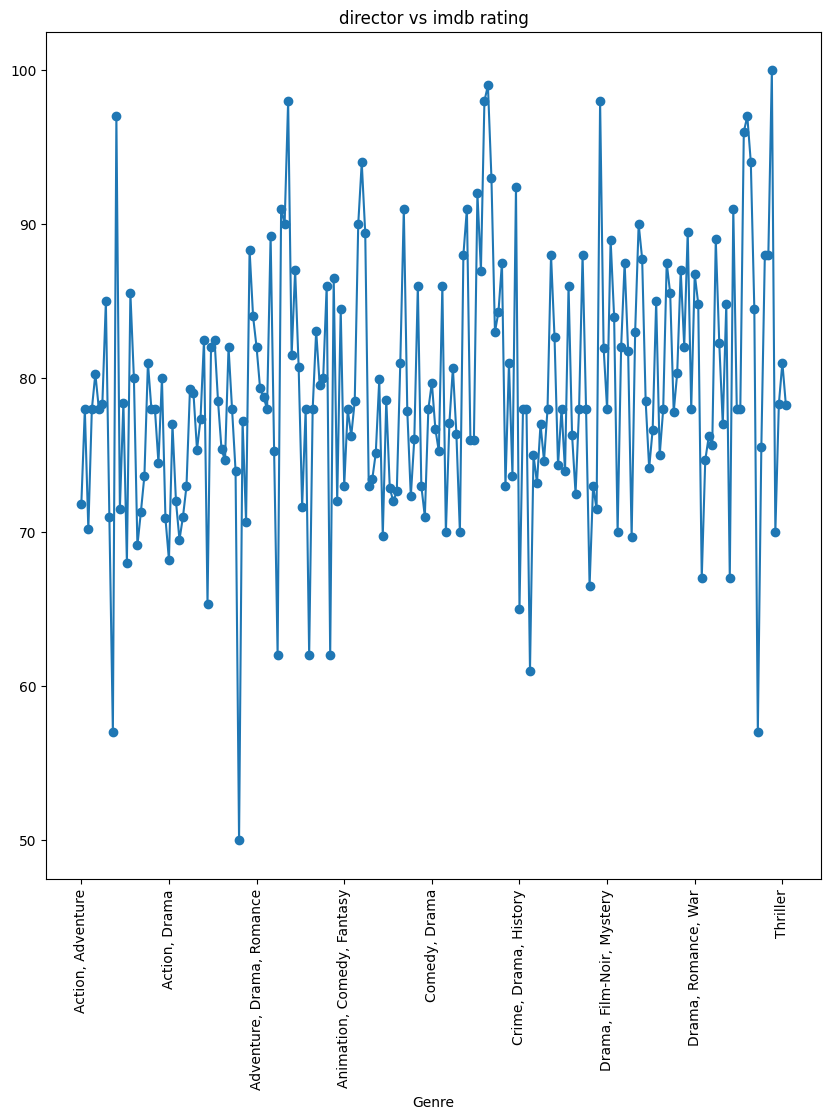

In [ ]:
## plot a line grpah

plt.figure(figsize=(10,11))
a2.plot(kind="line", marker="o")
plt.title("director vs imdb rating")
plt.xticks(rotation=90)
plt.show()

In [ ]:
a2=df.groupby(by=["Director","Genre"]).count()
a2

Series_Title  Released_Year  \
Director            Genre                                                    
Aamir Khan          Drama, Family                         1              1   
Aaron Sorkin        Drama, History, Thriller              1              1   
Abdellatif Kechiche Drama, Romance                        1              1   
Abhishek Chaubey    Action, Crime, Drama                  1              1   
Abhishek Kapoor     Drama, Sport                          1              1   
...                                                     ...            ...   
Zaza Urushadze      Drama, War                            1              1   
Zoya Akhtar         Comedy, Drama                         1              1   
                    Drama, Music, Romance                 1              1   
Çagan Irmak         Drama, Family                         1              1   
Ömer Faruk Sorak    Adventure, Comedy, Sci-Fi             1              1   

                                               Certificate  IMDB_Rating  \
Director            Genre                                                 
Aamir Khan          Drama, Family                        1            1   
Aaron Sorkin        Drama, History, Thriller             1            1   
Abdellatif Kechiche Drama, Romance                       1            1   
Abhishek Chaubey    Action, Crime, Drama                 1            1   
Abhishek Kapoor     Drama, Sport                         1            1   
...                                                    ...          ...   
Zaza Urushadze      Drama, War                           1            1   
Zoya Akhtar         Comedy, Drama                        1            1   
                    Drama, Music, Romance                1            1   
Çagan Irmak         Drama, Family                        1            1   
Ömer Faruk Sorak    Adventure, Comedy, Sci-Fi            1            1   

                                               Meta_score  Star1  Star2  \
Director            Genre                                                 
Aamir Khan          Drama, Family                       1      1      1   
Aaron Sorkin        Drama, History, Thriller            1      1      1   
Abdellatif Kechiche Drama, Romance                      1      1      1   
Abhishek Chaubey    Action, Crime, Drama                1      1      1   
Abhishek Kapoor     Drama, Sport                        1      1      1   
...                                                   ...    ...    ...   
Zaza Urushadze      Drama, War                          1      1      1   
Zoya Akhtar         Comedy, Drama                       1      1      1   
                    Drama, Music, Romance               1      1      1   
Çagan Irmak         Drama, Family                       1      1      1   
Ömer Faruk Sorak    Adventure, Comedy, Sci-Fi           1      1      1   

                                               No_of_Votes  Gross  
Director            Genre                                          
Aamir Khan          Drama, Family                        1      1  
Aaron Sorkin        Drama, History, Thriller             1      1  
Abdellatif Kechiche Drama, Romance                       1      1  
Abhishek Chaubey    Action, Crime, Drama                 1      1  
Abhishek Kapoor     Drama, Sport                         1      1  
...                                                    ...    ...  
Zaza Urushadze      Drama, War                           1      1  
Zoya Akhtar         Comedy, Drama                        1      1  
                    Drama, Music, Romance                1      1  
Çagan Irmak         Drama, Family                        1      1  
Ömer Faruk Sorak    Adventure, Comedy, Sci-Fi            1      1  

[911 rows x 9 columns]

In [ ]:
## Analysis of the No_of_votes of a movie vs directors.
b2=df.groupby("Director")["No_of_Votes"].sum().sort_values(ascending=False)
b2

Director
Christopher Nolan    11578345
Quentin Tarantino     8123208
Steven Spielberg      7817166
David Fincher         6607859
Martin Scorsese       6513530
                       ...   
J. Lee Thompson         26457
Peter Mullan            25938
René Laloux             25229
Francis Lee             25198
Kaige Chen              25088
Name: No_of_Votes, Length: 548, dtype: int64

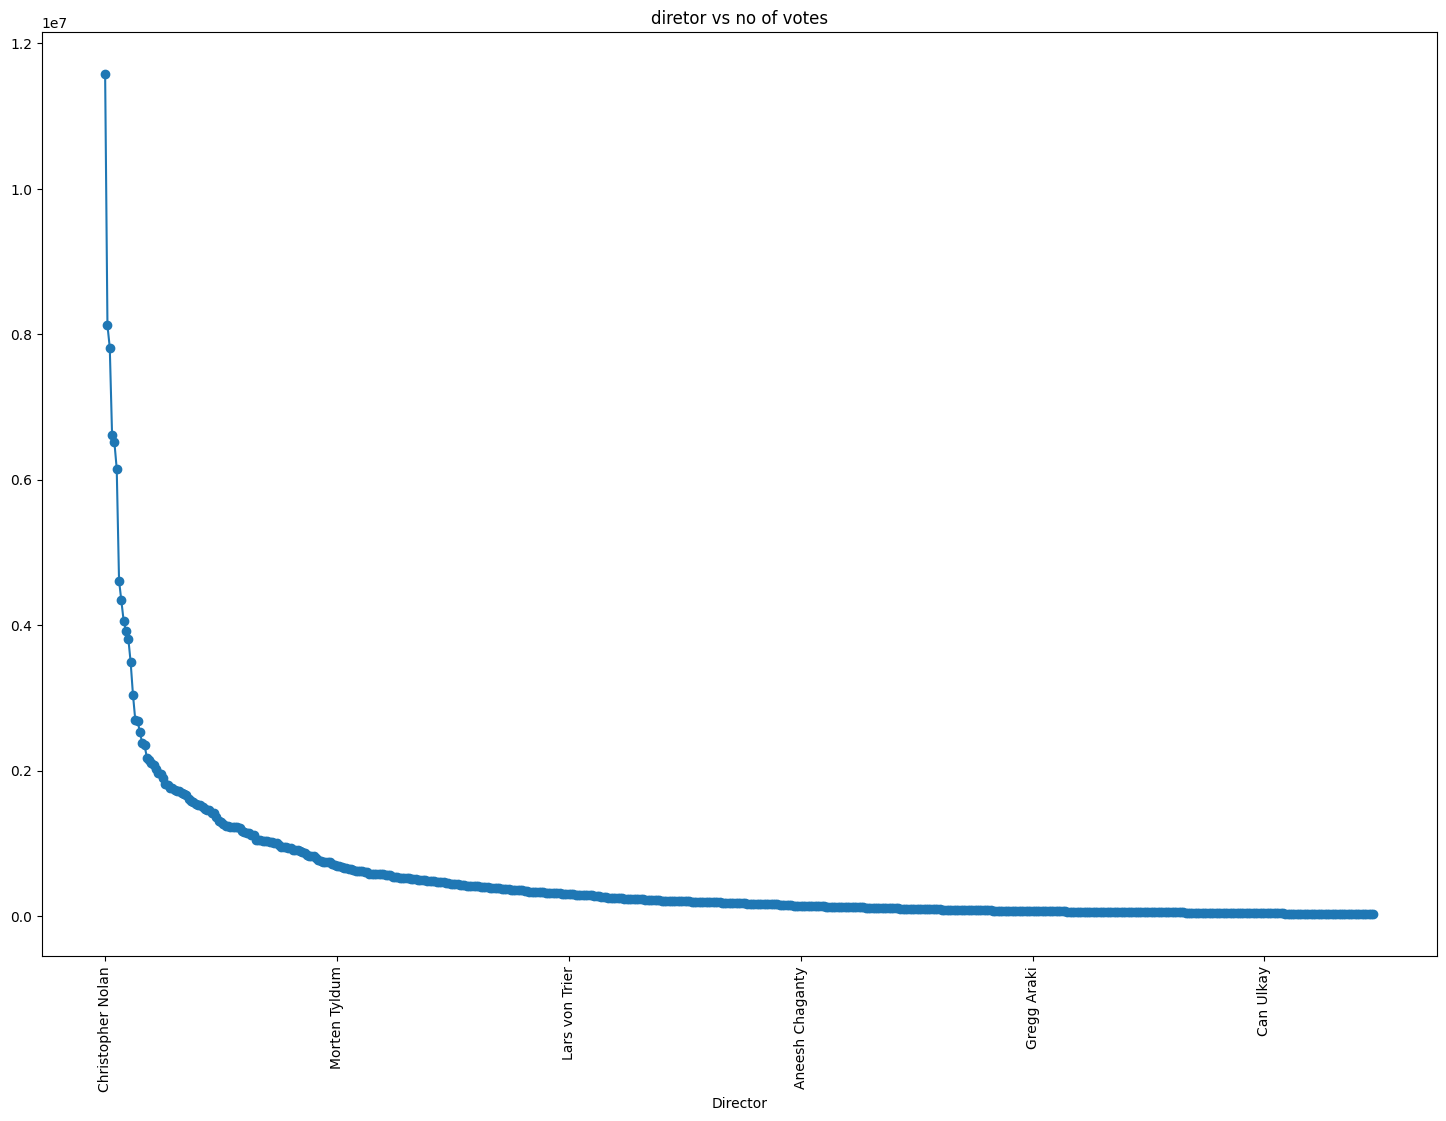

In [ ]:
##  plot a line grpah for directors vs no. of votes
plt.figure(figsize=(18,12))
b2.plot(kind="line", marker="o")
plt.xticks(rotation=90)
plt.title("diretor vs no of votes")
plt.show()

In [ ]:
## Analysis of the gross of a mo vs different - different stars
b3=df.groupby(["Star1","Star2"])["Gross"].sum().sort_values(ascending=False)
b3

Star1             Star2            
Joe Russo         Robert Downey Jr.    1.537188e+09
Daniel Radcliffe  Emma Watson          1.518325e+09
Tom Hanks         Tim Allen            1.040839e+09
Daisy Ridley      John Boyega          9.366622e+08
Mark Hamill       Harrison Ford        9.223406e+08
                                           ...     
Won Bin           Sae-ron Kim          6.460000e+03
Paddy Considine   Gary Stretch         6.013000e+03
Jared Leto        Sarah Polley         3.600000e+03
Til Schweiger     Jan Josef Liefers    3.296000e+03
Ulrich Thomsen    Mads Mikkelsen       1.305000e+03
Name: Gross, Length: 970, dtype: float64

Bivariate Analysis

<Axes: >

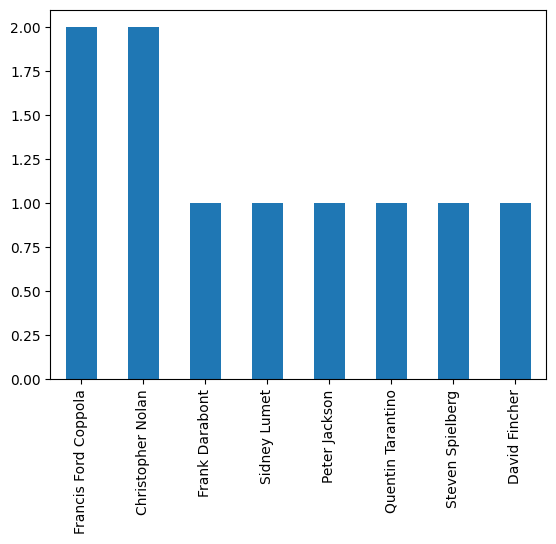

In [ ]:
df["Director"].head(10).value_counts().plot.bar()

scattter plot for distribution 

<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

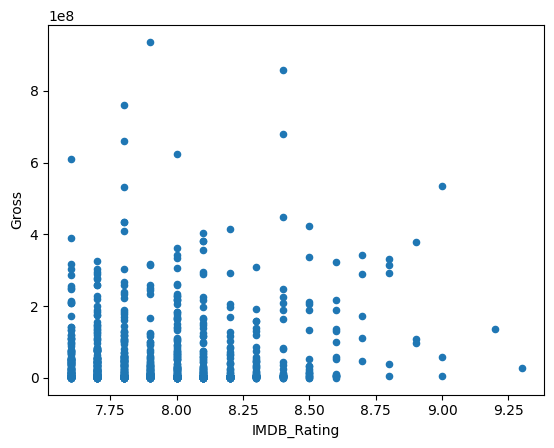

In [ ]:
df.plot.scatter(x="IMDB_Rating",y="Gross")

In [ ]:
## top 5 directors who ocuured mostly

df["Director"].value_counts()

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

Mostly occurred Directors(lineplot)

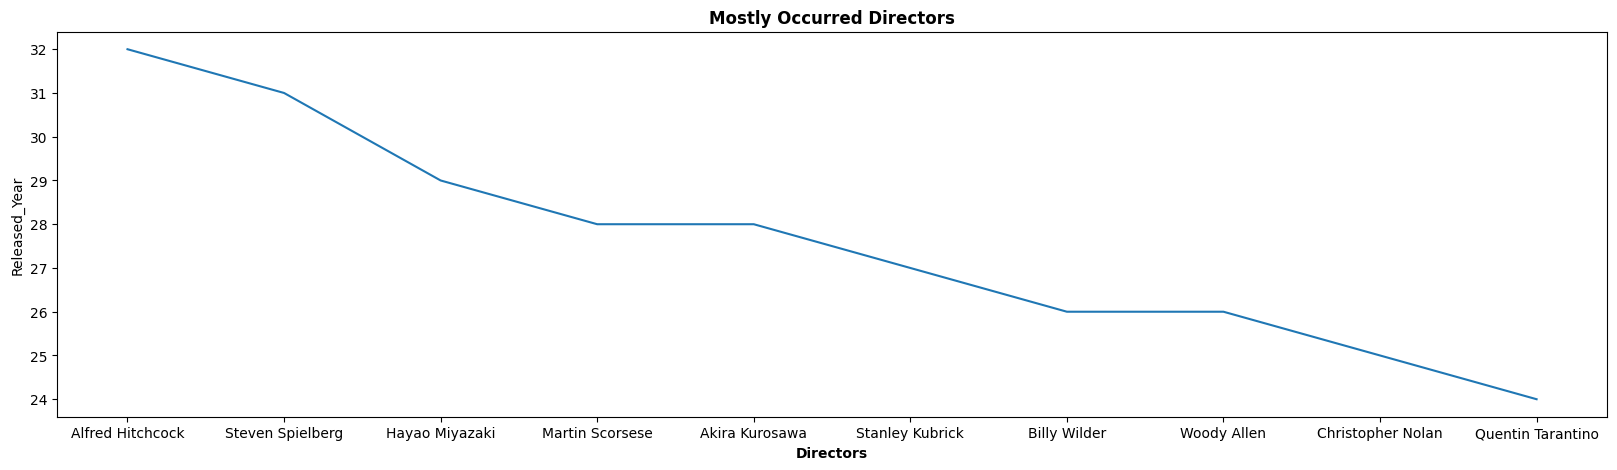

In [ ]:
plt.figure(figsize=(20,5))
g=sns.lineplot(x=df['Director'].value_counts()[:10].index,y=df['Released_Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

<Axes: xlabel='IMDB_Rating', ylabel='No_of_Votes'>

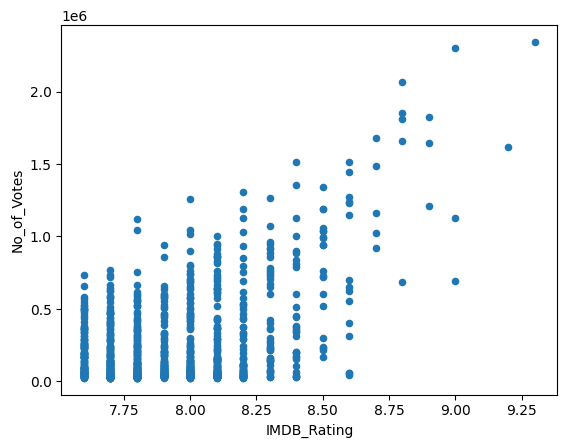

In [ ]:
## plot a scatter graph on imdb rating and no.of votes
df.plot.scatter(x="IMDB_Rating", y="No_of_Votes")

In [ ]:
a3=df["Certificate"].value_counts()
a3

U          346
A          197
UA         176
R          148
Passed      45
PG-13       44
PG          42
Unrated      1
Name: Certificate, dtype: int64

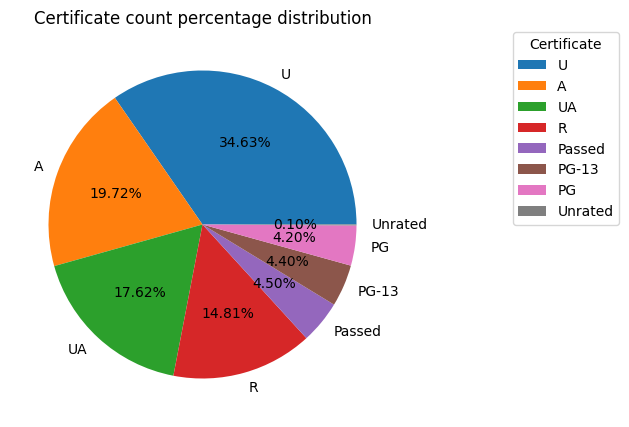

In [ ]:
plt.figure(figsize=(20,5))
plt.pie(a3.values,labels=a3.index, autopct='%.2f%%')
plt.title("Certificate count percentage distribution")
plt.legend(a3.index,title='Certificate',loc='right',bbox_to_anchor=(1,1,0.6,-0.5))
plt.show()

Gross of top  movies

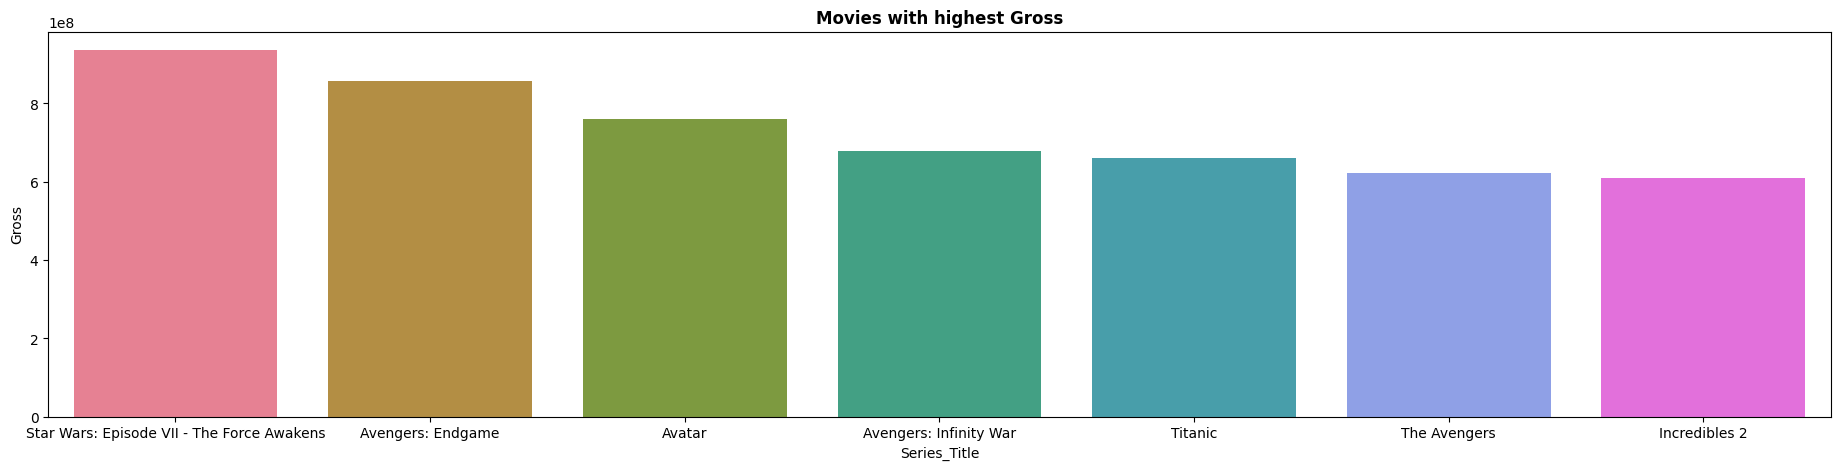

In [ ]:
highest_earning = df.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

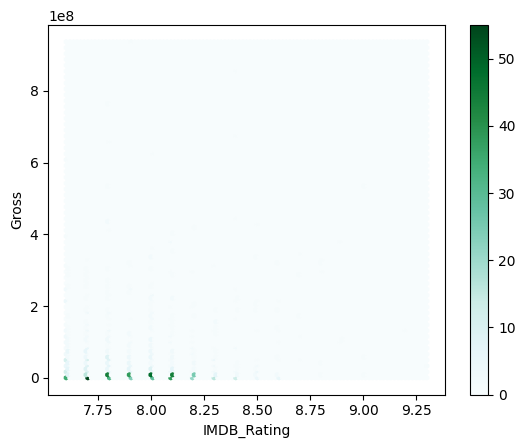

In [ ]:
df.plot.hexbin(x="IMDB_Rating", y="Gross")

In [ ]:
# correlation for dataset

correlation=df.corr()

<ipython-input-88-0308b6bbe954>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


plot a heatmap for correlation

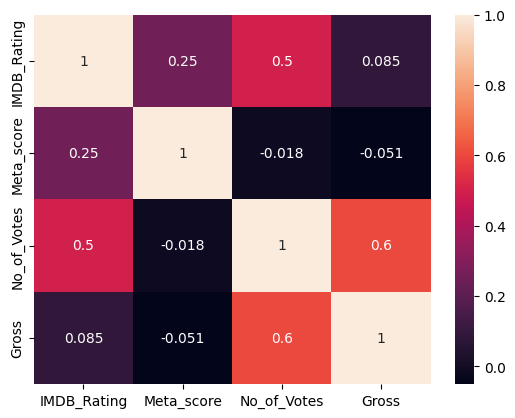

In [ ]:
sns.heatmap(correlation, annot=True)
plt.show()

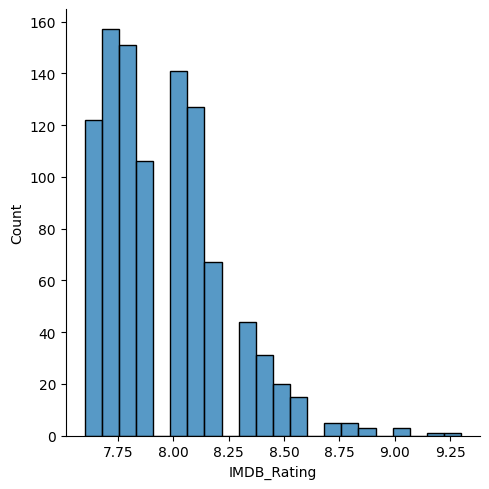

In [ ]:
sns.displot(df["IMDB_Rating"])
plt.show()

pairplot for column type

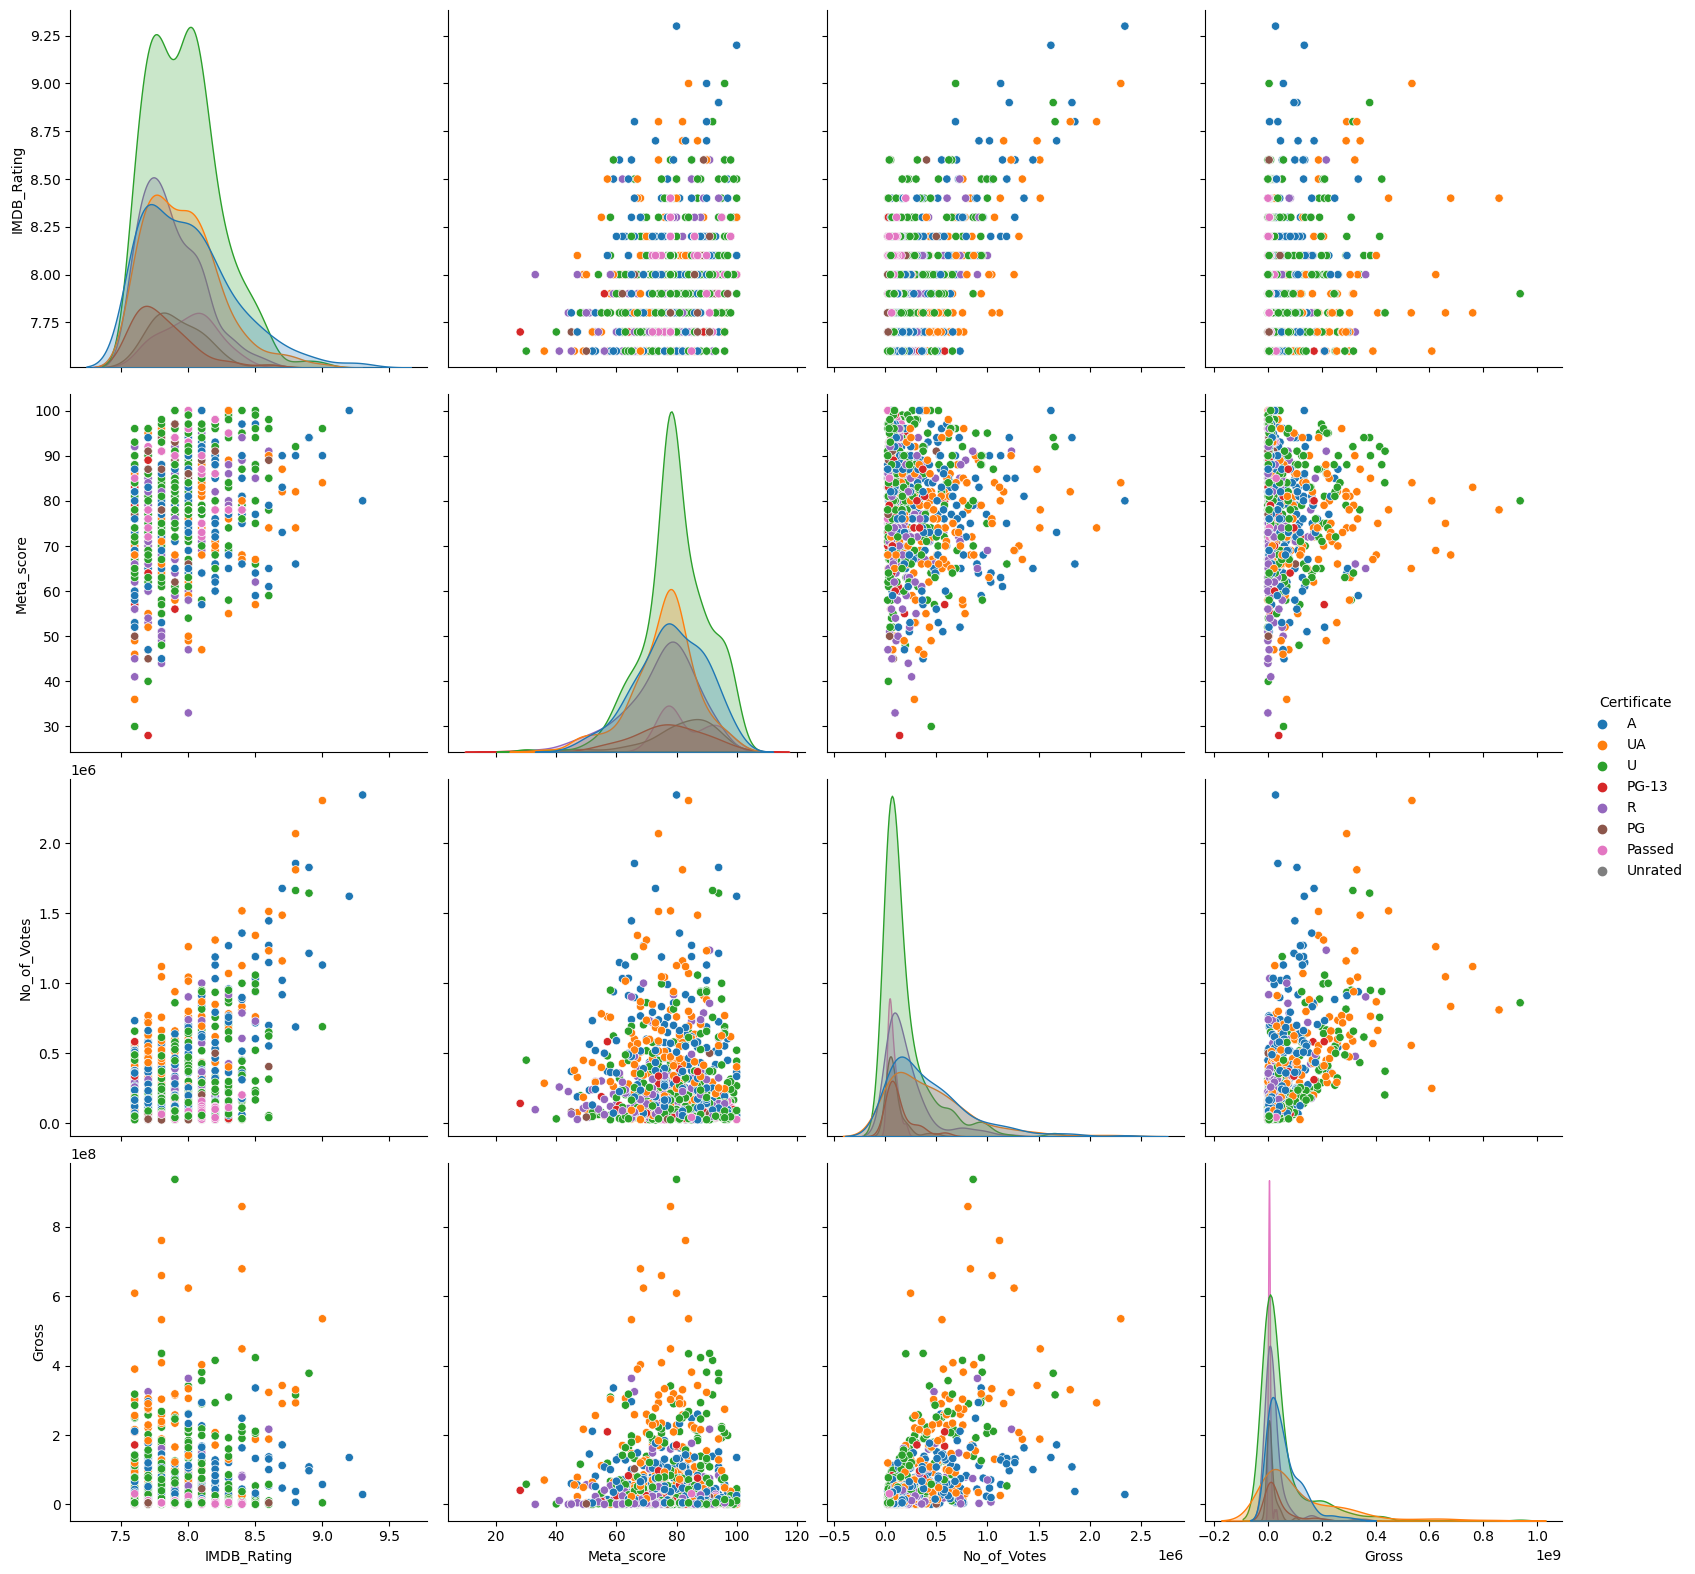

In [ ]:
sns.pairplot(df, hue="Certificate", height=4)
plt.show()

Insights

1. Top 5  genre with maximum number of movies
        Drama                         85
        Drama, Romance                37
        Comedy, Drama                 35
        Comedy, Drama, Romance        31
        Action, Crime, Drama          30

2. Top 5 certificate movies are in top rated
        U          346
        A          197
        UA         176
        R          148
        Passed      45

3. Top 5 directors who occured mostly
        Alfred Hitchcock    14
        Steven Spielberg    13
        Hayao Miyazaki      11
        Martin Scorsese     10
        Akira Kurosawa      10

4. 5 top Movies which has highest earning 
        Star wars : Episode VII
        Avengers End game
        Avatar 
        Avengers infinity war
        Titanic

5. Top 5 years in which maximum movies released
        2014    32
        2004    31
        2009    29
        2013    28
        2016    28

6. Top 5 directors who acquired maximum number of votes of their movie
        Christopher Nolan    11578345
        Quentin Tarantino     8123208
        Steven Spielberg      7817166
        David Fincher         6607859
        Martin Scorsese       6513530

7. Director who has most IMDB rating
        Alfred Hitchcock     112.1
        Steven Spielberg     104.4
        Hayao Miyazaki        88.2
        Akira Kurosawa        82.2
        Martin Scorsese       81.7
      
8. Top 5 imdb rating of top 5 star from the column star1
        Tom Hanks            96.5
        Robert De Niro       88.8
        Al Pacino            80.1
        Clint Eastwood       79.7
        Leonardo DiCaprio    73.2
  
9. Top 5 imdb rating of star from column star2
        Emma Watson           54.8
        Matt Damon            41.0
        Ian McKellen          33.2
        Brad Pitt             32.2
        Julie Delpy           31.7

10. Top 5 Genres with highest imdb rating
        Drama                   677.9
        Drama, Romance          293.6
        Comedy, Drama           275.5
        Comedy, Drama, Romance  244.2
        Action, Crime, Drama    236.4